# **CS2302 Data Structures**
**Assignment:** Lab 3 - Graphs, Connected Components, and Search

**Authors:** Eric Quezada

**Last modified:** March 17, 2023

**Due date:** March 31, 2023

## Submission

Rename this notebook as **LastName_FirstName_lab3_report.ipynb** before submitting.

## Submission and Grading Guidelines
**PLEASE READ THIS CAREFULLY!**

As stated in the syllabus your lab consists of two parts, the source code and the report. This Colab notebook contains all the starter code needed for the lab along with some explanations and hints. You will submit both your code and report in this single Colab notebook, therefore you must extend and modify this notebook to include everything required in the report guidelines in the syllabus.

**DO NOT CHANGE ANY OF THE FUNCTION NAMES OR PARAMETERS**

As the code will be auto-graded by another program, changing any of the function names or parameters will result in you getting 0 points for that problem. Therefore do not change any function names or parameters. Feel free to add more functions, test cases, and any other code as long as you do not modify the pre-existing function names. 

Compute the Big O running times of all your implemented functions and include them in your report.

Use plots and/or tables to illustrate your results.

## **Problem Description**

You will write a program to play the following word game: given English language words *w0* and *w1*, is it possible to convert *w0* into *w1* by replacing, inserting, or deleting one character at a time, with the restriction that all intermediate strings must also be words in the English language?

For example, the word *miners* can be transformed into the word *graph* by the following sequence:

```
miners ==> misers ==> risers ==> riser ==> rise ==> ripe ==> gripe ==> grape ==> graph
```

This problem can be solved efficiently using an undirected graph representation, where words are represented by vertices and valid transitions by edges. For example, there would be an undirected edge from the vertex representing *grape* to the vertex representing *graph*. 

Given words w1 and w2, there is a transformation from w1 to w2 (and viceversa) if their corresponding vertices are connected in the graph. This can be determined by applying the connected components algorithm and determining if w1 and w2 belong to the same component. 

In order to find the actual paths, we need to run a search algorithm, normally breadth-first search.

In some situations, we may prefer some transitions to others, for example, it may be more desirable to replace a vowel by another vowel, and a consonant by another consonant. We may also want to avoid insertions and deletions as much as possible. If transitions are not considered equivalent, we need a weighted graph to represent this information, where edge weights encode our preference for some transitions over others. For example, replacing a vowel by another vowel could have a cost or weight of 1, replacing a vowel by a consonant, or viceversa, could have a cost of 2, and insertions and deletions could have a cost of 3.

If we use a weighted graph representation, then the best transformation can be found by applying Dijkstra's algorithm 

## **Code Preparation and Provided Functions**






Import required libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import time

Upload the library *graph.py* and vocaubluary file *words_lab4.txt* from your computer using the code below:



In [3]:
for i in range(2):
  uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
    name=fn, length=len(uploaded[fn])))

Saving words_lab3.txt to words_lab3.txt
Saving graph.py to graph.py


To test the drawing function, we will use a very small vocabulary, with manually inserted edges. Use the draw() function **only for very small graphs and vocabularies**. 

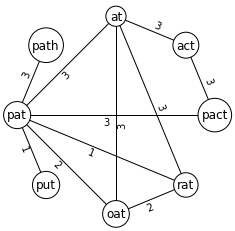

In [5]:
import graph
words = ['pat',  'put', 'oat', 'rat', 'pact', 'act', 'at','path']

G = graph.Graph(len(words),weighted=True)
G.insert_edge(0,1,1)
G.insert_edge(0,2,2)
G.insert_edge(0,3,1)
G.insert_edge(0,4,3)
G.insert_edge(0,7,3)
G.insert_edge(0,6,3)
G.insert_edge(2,3,2)
G.insert_edge(2,6,3)
G.insert_edge(3,6,3)
G.insert_edge(4,5,3)
G.insert_edge(5,6,3)

G.draw(vertex_names=words)

In [ ]:
words = ['pat',  'put', 'oat', 'rat', 'pact', 'act', 'at','path']

G = graph.Graph(len(words),weighted=True)
G.insert_edge(0,1,1)
G.insert_edge(0,2,2)
G.insert_edge(0,3,1)
G.insert_edge(0,4,3)
G.insert_edge(0,7,3)
G.insert_edge(0,6,3)
G.insert_edge(2,3,2)
G.insert_edge(2,6,3)
G.insert_edge(3,6,3)
G.insert_edge(4,5,3)
G.insert_edge(5,6,3)

G.draw(vertex_names=words)

In [ ]:
import graph

words = ['pat',  'put', 'oat', 'rat', 'pact', 'path', 'at','data']

G = graph.Graph(len(words),weighted=True)
G.insert_edge(0,1,1)
G.insert_edge(0,2,2)
G.insert_edge(0,3,1)
G.insert_edge(0,4,3)
G.insert_edge(0,5,3)
G.insert_edge(0,6,3)
G.insert_edge(2,3,2)
G.insert_edge(2,6,3)

G.draw(vertex_names=words)

To set the edge weights, we will use the scheme mentioned above:

1.   W[(u,v)] = 1 if *words[u]* can be transformed to *words[v]* replacing a vowel by a vowel
2.   W[(u,v)] = 1 if *words[u]* can be transformed to *words[v]* replacing a consonant by a consonant
2.   W[(u,v)] = 2 if *words[u]* can be transformed to *words[v]* replacing a vowel by a consonant
2.   W[(u,v)] = 2 if *words[u]* can be transformed to *words[v]* replacing a consonant by a vowel
3.   W[(u,v)] = 3 if *words[u]* can be transformed to *words[v]* deleting a character
3.   W[(u,v)] = 3 if *words[v]* can be transformed to *words[u]* deleting a character

## **Part 1 - Building the graph** 


In our graph, words[i] will be represented by vertex i. We will also need to build a dictionary that,  given a word, will return the vertex that represents it. 

Write the following functions:

1.   *read_words(filename)* that reads the words in the vocabulary file and returns a list containing those words in the order they appear in the file.
1.   *index_dictionary(words)* that returns a dictionary indicating 
the position where each word in *words* is stored.  
2.   *build_graph(words, D)*, that receives the list of words *words* and the index dictionary *D* and returns a graph with len(words) vertices representing the possible transitions between words. 

In [6]:
def read_words(filename):
    with open(filename, 'r') as f:
    # Read the content of the file and split it into words
      word_list = f.read().split()
    return word_list

In [7]:
def index_dictionary(words):
    D = {}
    for i, word in enumerate(words):
      D[word] = i
    return D

In [24]:
def is_valid_word(word, D):
    return word in D

def build_graph(words, D):
    letters = [chr(i) for i in range(97, 123)]
    letters.append('') # To perform deletions
    G = graph.Graph(len(words),weighted=True)
    
    for word in words:
        for c in word:
            for r in letters:
                new_word = word.replace(c, r)
                if is_valid_word(new_word, D) and new_word != word:
                    G.insert_edge(word, new_word)
    
    return G

This is the expected output for a small subset of the vocabulary. Use the commented line to read the actual data. 

8
['pat', 'put', 'oat', 'rat', 'pact', 'path', 'at', 'data']
{'pat': 0, 'put': 1, 'oat': 2, 'rat': 3, 'pact': 4, 'path': 5, 'at': 6, 'data': 7}
Error, vertex pat does not exist in graph
Error, vertex pat does not exist in graph
Error, vertex pat does not exist in graph
Error, vertex pat does not exist in graph
Error, vertex put does not exist in graph
Error, vertex oat does not exist in graph
Error, vertex oat does not exist in graph
Error, vertex oat does not exist in graph
Error, vertex rat does not exist in graph
Error, vertex rat does not exist in graph
Error, vertex rat does not exist in graph
Error, vertex pact does not exist in graph
Error, vertex path does not exist in graph
Graph representation
directed: False, weighted: True
Vertex set:
{0, 1, 2, 3, 4, 5, 6, 7}
Edge dictionary:
{0: set(), 1: set(), 2: set(), 3: set(), 4: set(), 5: set(), 6: set(), 7: set()}
Weight dictionary:
{}


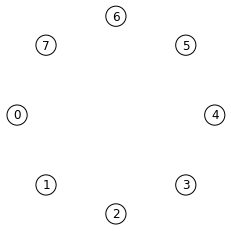

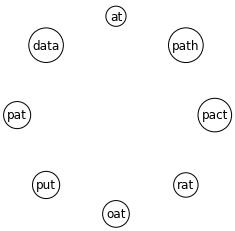

In [25]:
words = ['pat',  'put', 'oat', 'rat', 'pact', 'path', 'at','data']
print(len(words))
print(words)
Index = index_dictionary(words)
print(Index)
G= build_graph(words,Index)
G.display()
G.draw()
G.draw(vertex_names=words)

In [27]:
words = read_words('words_lab3.txt')
print(len(words))
print(words[:10])
Index = index_dictionary(words)
print(len(Index))
G= build_graph(words,Index)
print(len(G.V))

Streaming output truncated to the last 5000 lines.
Error, vertex blench does not exist in graph
Error, vertex blench does not exist in graph
Error, vertex blenched does not exist in graph
Error, vertex blenched does not exist in graph
Error, vertex blend does not exist in graph
Error, vertex blend does not exist in graph
Error, vertex blend does not exist in graph
Error, vertex blend does not exist in graph
Error, vertex blend does not exist in graph
Error, vertex blend does not exist in graph
Error, vertex blend does not exist in graph
Error, vertex blended does not exist in graph
Error, vertex blender does not exist in graph
Error, vertex blender does not exist in graph
Error, vertex blender does not exist in graph
Error, vertex blender does not exist in graph
Error, vertex blender does not exist in graph
Error, vertex blenders does not exist in graph
Error, vertex blenders does not exist in graph
Error, vertex blenders does not exist in graph
Error, vertex blenders does not exist in

KeyboardInterrupt: ignored

## **Part 2 - Basic Graph Operations**

Write the following two functions:

1. *find_neighbors(G,w,D,words)* that returns the neighbors of the word *w*, including the weights of the edge conneting w to the each neighbor. \\
2. *most_neighbors(G,words)* that returns the word that has the maximum number of neighbors. 
2. *isolated_words(G,words)* that returns a list of the words that are not connected to any other words. \\
 

In [ ]:
def find_neighbors(G,w,D,words):
    # write your code here
    return 

def most_neighbors(G,words):
    # write your code here
    return 

def isolated_words(G,words):
    # write your code here
    I = []
    return I

In [ ]:
words = read_words('words_lab4.txt')
print(words[:20])

Index = index_dictionary(words)
print(Index)
G= build_graph(words,Index)

w = most_neighbors(G,words)
print('The word with the most neighbors is:',w)
print('The neighbors are:\n', find_neighbors(G,w,Index,words))

I = isolated_words(G,words)
print('There are {} isolated words'.format(len(I)))
print(I[:20])


58102
['aardvark', 'aardwolf', 'aaron', 'aback', 'abacus', 'abaft', 'abalone', 'abandon', 'abandoned', 'abandonment', 'abandons', 'abase', 'abased', 'abasement', 'abash', 'abashed', 'abate', 'abated', 'abatement', 'abates']
{'aardvark': 0, 'aardwolf': 1, 'aaron': 2, 'aback': 3, 'abacus': 4, 'abaft': 5, 'abalone': 6, 'abandon': 7, 'abandoned': 8, 'abandonment': 9, 'abandons': 10, 'abase': 11, 'abased': 12, 'abasement': 13, 'abash': 14, 'abashed': 15, 'abate': 16, 'abated': 17, 'abatement': 18, 'abates': 19, 'abattoir': 20, 'abattoirs': 21, 'abba': 22, 'abbe': 23, 'abbess': 24, 'abbey': 25, 'abbeys': 26, 'abbot': 27, 'abbots': 28, 'abbreviate': 29, 'abbreviated': 30, 'abbreviates': 31, 'abbreviating': 32, 'abbreviation': 33, 'abbreviations': 34, 'abdicate': 35, 'abdicated': 36, 'abdicates': 37, 'abdicating': 38, 'abdication': 39, 'abdomen': 40, 'abdomens': 41, 'abdominal': 42, 'abduct': 43, 'abducted': 44, 'abducting': 45, 'abduction': 46, 'abductions': 47, 'abductor': 48, 'abductors': 4

In [ ]:
np.random.seed(0)
L = [words[i] for i in np.random.randint(0,len(words),10)]

print()
for w in L:
    print('The neighbors of -',w,'- are:')
    print(find_neighbors(G,w,Index,words))


The neighbors of - artless - are:
[('armless', 1)]
The neighbors of - roasted - are:
[('coasted', 1), ('roosted', 1), ('roaster', 1), ('toasted', 1), ('boasted', 1)]
The neighbors of - reschedule - are:
[('rescheduled', 3)]
The neighbors of - totals - are:
[('total', 3)]
The neighbors of - shinning - are:
[('spinning', 1), ('skinning', 1), ('shunning', 1), ('thinning', 1), ('shining', 3), ('sinning', 3)]
The neighbors of - ganglion - are:
[]
The neighbors of - magnet - are:
[('magneto', 3), ('magnets', 3)]
The neighbors of - misfire - are:
[('misfired', 3), ('misfires', 3)]
The neighbors of - relapses - are:
[('relapsed', 1), ('elapses', 3), ('relapse', 3)]
The neighbors of - wheezes - are:
[('wheezed', 1), ('wheeze', 3)]


## **Part  3 - Connected components and efficient query answering** 

We can determine if it is possible to convert one word into another in constant time using connected components. 

Write the following functions:



1.   connected_components(G) that returns a list of sets representing the connected components of graph G. 
2.   num_sets(S) that returns the number of sets in S, corresponding to the number of connected components in G.
3.   num_singletons(S) that returns the number of sets in S that have a single element.
4.   largest_set(S) that returns the size of the largest set in S. 
5.   words_in_largest_set(S, words) that returns the list of words that are in he largest set found by the connected components algorithm.
6.  set_dictionary(Cc, D, words) that receives the connected components Cc, the index dictionary D, and the word list and returns a dictionary D such that D[w] is the set (or component) to which word w belongs. 
7.   are_connected(Sd, w1,w2) that receives the set dictionary Sd from the previous questions,  and words w1 and w2 and determines if it is possible to transform w1 into w2. This function must run in O(1) time.


In [ ]:
def connected_components(G):
    # write your code here
    return S

def num_sets(S):
    # write your code here
    return 

def num_singletons(S):
    # write your code here
    return 

def largest_set(S):
    # write your code here
    return 

def words_in_largest_set(S,words):
    # write your code here
    return 

def set_dictionary(S, D, words):
    return

def are_connected(Sd, w1,w2):
    # write your code here
    return  


You may want to upload and import dsf.py (not necessary if you use the less efficient version of connected components). 

In [ ]:
uploaded = files.upload()

In [ ]:
start = time.time()
S = connected_components(G)
elapsed_time = time.time() - start
print('The graph contains {} sets, including {} singletons'.format(num_sets(S),num_singletons(S)))
print('The largest set contains {} elements'.format(largest_set(S)))
words_largest_set = words_in_largest_set(S,words)
print('The following words are in the largest set:', words_largest_set[:5])
print('elapsed time using connected_components is', elapsed_time,'secs')

The graph contains 27392 sets, including 18669 singletons
The largest set contains 16821 elements
The following words are in the largest set: ['mother', 'aaron', 'aback', 'abase', 'abased']
elapsed time using connected_components is 0.18305230140686035 secs


In [ ]:
Sd = set_dictionary(S, words)

In [ ]:
np.random.seed(0)
L1 = [words[i] for i in np.random.randint(0,len(words),5)]
L2 = [words[i] for i in np.random.randint(0,len(words),5)]
for w1 in L1:
  for w2 in L2:
    print('are_connected(S, D, {}, {}) = {}'.format(w1, w2, are_connected(Sd, w1, w2)))

are_connected(S, D, artless, ganglion) = False
are_connected(S, D, artless, magnet) = False
are_connected(S, D, artless, misfire) = False
are_connected(S, D, artless, relapses) = False
are_connected(S, D, artless, wheezes) = False
are_connected(S, D, roasted, ganglion) = False
are_connected(S, D, roasted, magnet) = False
are_connected(S, D, roasted, misfire) = False
are_connected(S, D, roasted, relapses) = True
are_connected(S, D, roasted, wheezes) = True
are_connected(S, D, reschedule, ganglion) = False
are_connected(S, D, reschedule, magnet) = False
are_connected(S, D, reschedule, misfire) = False
are_connected(S, D, reschedule, relapses) = False
are_connected(S, D, reschedule, wheezes) = False
are_connected(S, D, totals, ganglion) = False
are_connected(S, D, totals, magnet) = False
are_connected(S, D, totals, misfire) = False
are_connected(S, D, totals, relapses) = False
are_connected(S, D, totals, wheezes) = False
are_connected(S, D, shinning, ganglion) = False
are_connected(S, D, 

Using words that are in the largest set (thus they must be connected).

In [ ]:
np.random.seed(0)
L1 = [words_largest_set[i] for i in np.random.randint(0,len(words_largest_set),5)]
L2 = [words_largest_set[i] for i in np.random.randint(0,len(words_largest_set),5)]
for w1 in L1:
  for w2 in L2:
    print('are_connected(S, D, {}, {}) = {}'.format(w1, w2, are_connected(Sd, w1, w2)))

are_connected(S, D, bodes, whole) = True
are_connected(S, D, bodes, podgy) = True
are_connected(S, D, bodes, lag) = True
are_connected(S, D, bodes, live) = True
are_connected(S, D, bodes, danes) = True
are_connected(S, D, thug, whole) = True
are_connected(S, D, thug, podgy) = True
are_connected(S, D, thug, lag) = True
are_connected(S, D, thug, live) = True
are_connected(S, D, thug, danes) = True
are_connected(S, D, enquires, whole) = True
are_connected(S, D, enquires, podgy) = True
are_connected(S, D, enquires, lag) = True
are_connected(S, D, enquires, live) = True
are_connected(S, D, enquires, danes) = True
are_connected(S, D, venus, whole) = True
are_connected(S, D, venus, podgy) = True
are_connected(S, D, venus, lag) = True
are_connected(S, D, venus, live) = True
are_connected(S, D, venus, danes) = True
are_connected(S, D, dusts, whole) = True
are_connected(S, D, dusts, podgy) = True
are_connected(S, D, dusts, lag) = True
are_connected(S, D, dusts, live) = True
are_connected(S, D, d

## **Part 4 - Finding the lowest cost transformation from a word into another word using Dijkstra's algorithm**

Write the functions

1.    *transform(G, D, words, w1, w2)* that returns a list containing the lowest cost sequence of transformations to convert word w1 into word w2, and the total cost of the transformation.

2.   *most_disimilar(G, Index, words, w1)* that returns the word that can be reached from w1 that has the largest distance from w1, that is, the most disimilar word that w1 can be transformed to. Notice that is w1 is in a singleton, the function must return w1 itself, since it's the only word that can be reached from w1.



You may want to upload min_heap.py

In [ ]:
uploaded = files.upload()

Here's the code for Dijkstra's algorithm, which your functions may use.

In [ ]:
import min_heap

def dijkstra(G,source):
    visited = set()
    dist  = [np.inf for v in G.V]
    prev  = [-1 for v in G.V]
    dist[source] = 0
    H = min_heap.min_heap()
    H.insert(min_heap.heap_record(0,source))
    while len(H.heap)>0 and len(visited)<len(G.V):
        v = H.extract_min().data
        if v not in visited and dist[v] != np.inf:
            visited.add(v)
            for u in G.E[v]:
                alt_dist = dist[v] + G.W[(v,u)]
                if alt_dist < dist[u]: # Path going through v is shorter than previously found path
                    dist[u] = alt_dist
                    prev[u] = v
                    H.insert(min_heap.heap_record(alt_dist,u))
    return prev, dist

Function to generate a string from a list of words

In [ ]:
def get_path_string(path):
    pp = [w + ' ==> ' for w in path[:-1]]
    pp.append(path[-1])
    return ''.join(pp)

In [ ]:
def transform(G, D, words, w1, w2):
  return [], 0

A test

In [ ]:
word_seq, cost = transform(G, Index, words, 'miner', 'graphs')
print('The sequence of words is:', word_seq)
print('The total cost is:', cost)
print('The word transformation is:\n',get_path_string(word_seq))

The sequence of words is: ['miner', 'mines', 'mites', 'mates', 'gates', 'gapes', 'grapes', 'graphs']
The total cost is: 10
The word transformation is:
 miner ==> mines ==> mites ==> mates ==> gates ==> gapes ==> grapes ==> graphs


Expected results for some random words taken from the original word list.

In [ ]:
np.random.seed(0)
L1 = [words[i] for i in np.random.randint(0,len(words),5)]
L2 = [words[i] for i in np.random.randint(0,len(words),5)]
for w1 in L1:
  for w2 in L2:
      print('Transforming',w1,'to',w2)
      word_seq, cost = transform(G, Index, words, w1, w2)
      print('The sequence of words is:', word_seq)
      print('The total cost is:', cost)
      if cost!=np.inf:
          print('The word transformation is:\n'+get_path_string(word_seq))
      print()

Transforming artless to ganglion
The sequence of words is: None
The total cost is: inf

Transforming artless to magnet
The sequence of words is: None
The total cost is: inf

Transforming artless to misfire
The sequence of words is: None
The total cost is: inf

Transforming artless to relapses
The sequence of words is: None
The total cost is: inf

Transforming artless to wheezes
The sequence of words is: None
The total cost is: inf

Transforming roasted to ganglion
The sequence of words is: None
The total cost is: inf

Transforming roasted to magnet
The sequence of words is: None
The total cost is: inf

Transforming roasted to misfire
The sequence of words is: None
The total cost is: inf

Transforming roasted to relapses
The sequence of words is: ['roasted', 'boasted', 'basted', 'pasted', 'passed', 'passes', 'lasses', 'lapses', 'elapses', 'relapses']
The total cost is: 15
The word transformation is:
roasted ==> boasted ==> basted ==> pasted ==> passed ==> passes ==> lasses ==> lapses ==

Now let's use some random words taken from the list of words in the largest set, so a transformation is guaranteed to exist.

In [ ]:
np.random.seed(0)
L1 = [words_largest_set[i] for i in np.random.randint(0,len(words_largest_set),5)]
L2 = [words_largest_set[i] for i in np.random.randint(0,len(words_largest_set),5)]
for w1 in L1:
  for w2 in L2:
      print('Transforming',w1,'to',w2)
      word_seq, cost = transform(G, Index, words, w1, w2)
      print('The sequence of words is:', word_seq)
      print('The total cost is:', cost)
      if cost!=np.inf:
          print('The word transformation is:\n'+get_path_string(word_seq))
      print()

Transforming bodes to whole
The sequence of words is: ['bodes', 'bode', 'bole', 'hole', 'whole']
The total cost is: 8
The word transformation is:
bodes ==> bode ==> bole ==> hole ==> whole

Transforming bodes to podgy
The sequence of words is: ['bodes', 'bones', 'boney', 'bogey', 'boggy', 'doggy', 'dodgy', 'podgy']
The total cost is: 8
The word transformation is:
bodes ==> bones ==> boney ==> bogey ==> boggy ==> doggy ==> dodgy ==> podgy

Transforming bodes to lag
The sequence of words is: ['bodes', 'bode', 'bade', 'lade', 'lad', 'lag']
The total cost is: 9
The word transformation is:
bodes ==> bode ==> bade ==> lade ==> lad ==> lag

Transforming bodes to live
The sequence of words is: ['bodes', 'bode', 'lode', 'love', 'live']
The total cost is: 6
The word transformation is:
bodes ==> bode ==> lode ==> love ==> live

Transforming bodes to danes
The sequence of words is: ['bodes', 'bones', 'cones', 'canes', 'danes']
The total cost is: 4
The word transformation is:
bodes ==> bones ==> co

In [ ]:
def most_disimilar(G, D, words, w1):
    return w2, word_seq, cost


Finding the most disimilar words for words in the original list. 


In [ ]:
np.random.seed(1)
L1 = [words[i] for i in np.random.randint(0,len(words),10)]
for w1 in L1:
    w2, word_seq, cost = most_disimilar(G, Index, words, w1)
    print('The most disimilar word that can be reached from',w1,'is',w2)
    print('The sequence of words is:', word_seq)
    print('The total cost is:', cost)
    print('The word transformation is:\n'+get_path_string(word_seq))
    print()
    

The most disimilar word that can be reached from multilevel is multilevel
The sequence of words is: ['multilevel']
The total cost is: 0
The word transformation is:
multilevel

The most disimilar word that can be reached from cytogenetic is cytogenetic
The sequence of words is: ['cytogenetic']
The total cost is: 0
The word transformation is:
cytogenetic

The most disimilar word that can be reached from bloodless is bloodless
The sequence of words is: ['bloodless']
The total cost is: 0
The word transformation is:
bloodless

The most disimilar word that can be reached from mongrels is mongrel
The sequence of words is: ['mongrels', 'mongrel']
The total cost is: 3
The word transformation is:
mongrels ==> mongrel

The most disimilar word that can be reached from superglue is superglue
The sequence of words is: ['superglue']
The total cost is: 0
The word transformation is:
superglue

The most disimilar word that can be reached from rosily is mostly
The sequence of words is: ['rosily', 'cosily

Now using words where transformations are guaranteed to exist.

In [ ]:
np.random.seed(1)
L1 = [words_largest_set[i] for i in np.random.randint(0,len(words_largest_set),10)]
for w1 in L1:
    w2, word_seq, cost = most_disimilar(G, Index, words, w1)
    print('The most disimilar word that can be reached from',w1,'is',w2)
    print('The sequence of words is:', word_seq)
    print('The total cost is:', cost)
    print('The word transformation is:\n'+get_path_string(word_seq))
    print()

The most disimilar word that can be reached from mutters is personages
The sequence of words is: ['mutters', 'matters', 'matter', 'mater', 'mate', 'ate', 'age', 'ago', 'ego', 'ergo', 'ergot', 'argot', 'argon', 'arson', 'parson', 'person', 'persona', 'personae', 'personage', 'personages']
The total cost is: 41
The word transformation is:
mutters ==> matters ==> matter ==> mater ==> mate ==> ate ==> age ==> ago ==> ego ==> ergo ==> ergot ==> argot ==> argon ==> arson ==> parson ==> person ==> persona ==> personae ==> personage ==> personages

The most disimilar word that can be reached from gait is hammered
The sequence of words is: ['gait', 'bait', 'bart', 'bard', 'bared', 'baked', 'beaked', 'peaked', 'peeked', 'peered', 'petered', 'pestered', 'festered', 'fettered', 'bettered', 'battered', 'bantered', 'cantered', 'catered', 'capered', 'papered', 'pampered', 'hampered', 'hammered']
The total cost is: 36
The word transformation is:
gait ==> bait ==> bart ==> bard ==> bared ==> baked ==> 